# Introduction:

    - Objective: Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.
    
    - Target variable → Bad_label
    
    - 0 – Customer has Good credit history
    
    - 1 – Customer has Bad credit history

# Importing Libraries:

In [4]:
#!pip install --upgrade scikit-learn
#!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [6]:
pd.set_option('display.max_column',None)

# Importing Data:

In [8]:
data = pd.read_csv('final_data.csv')
data.head()

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_19,feature_21,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,Enquiry_Count
0,2015-11-10,12265,2015-10-20,6,2013-06-09,2015-09-30,20900,0,2015-09-01,2014-07-01,2015-11-10,2015-10-15,4,683,56000,0,15,1,10,1,1984-06-15,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
1,2015-11-10,12265,2015-10-20,10,2012-05-25,2015-10-03,16201,10390,2015-10-01,2012-11-01,2015-11-10,2015-10-15,4,683,56000,0,15,1,10,1,1984-06-15,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
2,2015-11-10,12265,2015-10-20,10,2012-03-22,2015-09-30,41028,34420,2015-09-01,2012-10-01,2015-11-10,2015-10-15,4,683,56000,0,15,1,10,1,1984-06-15,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
3,2015-07-20,15606,2015-07-09,10,2006-01-13,2009-01-31,93473,0,2007-07-01,2006-02-01,2015-07-20,2015-07-06,3,687,125000,0,15,1,7,1,1980-06-20,0,1,2,9,18,121003,2009,0,4,1,1,100000,7,1,2019,2013,1,2,0,21,121003,3,0,0,1,13,0,1,0,1,13,39,121003,0,1,100000,13,1,0,1,0,1,33
4,2015-07-20,15606,2015-07-09,6,2015-01-18,2015-05-31,20250,13500,2015-05-01,2015-01-01,2015-07-20,2015-07-06,3,687,125000,0,15,1,7,1,1980-06-20,0,1,2,9,18,121003,2009,0,4,1,1,100000,7,1,2019,2013,1,2,0,21,121003,3,0,0,1,13,0,1,0,1,13,39,121003,0,1,100000,13,1,0,1,0,1,33


In [9]:
# Loop through each column
for column_name in data.columns:
    if data[column_name].dtype == 'object':  # Checking if the column is of object data type
        try:
            data[column_name] = pd.to_datetime(data[column_name])
            data[column_name] = data[column_name].astype('int64')
        except ValueError:  # If conversion to datetime fails, it retains the original object type
            pass
    if data[column_name].dtype == 'int64':  # Checking if the column is of int64 data type
        data[column_name] = pd.to_numeric(data[column_name], downcast='integer')
# Above code will check for data type and convert into memory efficient data type.

# EDA:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182709 entries, 0 to 182708
Data columns (total 64 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   dt_opened_x      182709 non-null  int64
 1   customer_no      182709 non-null  int16
 2   upload_dt        182709 non-null  int64
 3   acct_type        182709 non-null  int8 
 4   opened_dt        182709 non-null  int64
 5   reporting_dt     182709 non-null  int64
 6   high_credit_amt  182709 non-null  int32
 7   cur_balance_amt  182709 non-null  int32
 8   paymt_str_dt     182709 non-null  int64
 9   paymt_end_dt     182709 non-null  int64
 10  dt_opened_y      182709 non-null  int64
 11  entry_time       182709 non-null  int64
 12  feature_1        182709 non-null  int8 
 13  feature_3        182709 non-null  int16
 14  feature_7        182709 non-null  int32
 15  feature_8        182709 non-null  int8 
 16  feature_9        182709 non-null  int8 
 17  feature_11       182709 non-n

In [12]:
data.describe()

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_19,feature_21,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,Enquiry_Count
count,1.827090e+05,182709.000000,1.827090e+05,182709.000000,1.827090e+05,1.827090e+05,1.827090e+05,1.827090e+05,1.827090e+05,1.827090e+05,1.827090e+05,1.827090e+05,182709.000000,182709.000000,1.827090e+05,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,1.827090e+05,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.00000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,1.827090e+05,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,1.827090e+05,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,1.827090e+05,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000,182709.000000
mean,1.442130e+18,11445.288650,1.440131e+18,8.403450,1.309148e+18,1.405866e+18,1.695882e+05,7.664105e+04,1.385665e+18,1.339597e+18,1.442130e+18,1.439747e+18,4.159281,648.077276,1.344161e+05,0.536421,14.685226,0.954731,9.930430,1.039363,9.843840e+17,0.116896,1.159954,0.850828,6.129512,34.327318,242728.77109,2000.315721,0.603566,3.223580,0.861747,1.281387,3.858271e+04,5.535830,3.787044,2764.226666,1447.519263,3.112600,5.968589,0.110859,38.880925,246117.002195,2.970111,0.557772,8.351855e+04,1.070287,13.392860,0.021269,0.954731,0.014061,0.999830,14.265127,142.238368,275151.200171,0.138253,1.281387,3.858271e+04,14.305141,0.698449,0.005161,1.040896,0.000159,0.035176,25.063155
std,5.993715e+15,6734.408298,5.959618e+15,5.160611,1.156253e+17,5.864506e+16,9.680296e+05,6.227483e+05,8.544590e+16,8.759140e+16,5.993715e+15,6.035351e+15,1.180867,226.303671,9.192940e+04,2.494042,1.702498,0.207893,2.774026,0.194458,1.109241e+18,0.321298,0.366564,1.170805,1.714121,11.990126,170907.52242,12.661735,2.255025,0.870148,0.345166,0.453459,1.035021e+05,3.096936,3.079655,1405.930518,901.980240,3.560683,4.480088,0.791002,13.522728,168506.001214,0.440693,0.496653,1.262842e+05,0.359166,8.511765,0.144279,0.207893,0.117741,0.013025,9.367584,179.161254,196390.783460,0.345166,0.453459,1.035021e+05,9.093856,0.458932,0.094399,0.220067,0.012598,0.184225,19.241708
min,1.429142e+18,1.000000,1.429574e+18,0.000000,3.075840e+17,1.076717e+18,1.000000e+00,-7.355205e+06,7.494336e+17,7.285248e+17,1.429142e+18,1.422749e+18,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.262304e+17,0.000000,1.000000,0.000000,0.000000,0.000000,110001.00000,1964.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.437350e+18,5870.000000,1.435190e+18,6.000000,1.213402e+18,1.401754e+18,2.400000e+04,0.000000e+00,1.364774e+18,1.309478e+18,1.437350e+18,1.435018e+18,3.000000,690.000000,8.000000e+04,0.000000,15.000000,1.000000,7.000000,1.000000,3.323808e+17,0.000000,1.000000,0.000000,5.000000,25.000000,110057.00000,1990.000000,0.000000,2.000000,1.000000,1.000000,1.000000e+00,2.000000,1.000000,1756.000

In [13]:
data.isnull().sum()

dt_opened_x      0
customer_no      0
upload_dt        0
acct_type        0
opened_dt        0
                ..
feature_76       0
feature_78       0
feature_79       0
Bad_label        0
Enquiry_Count    0
Length: 64, dtype: int64

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
duplicates = data[data.duplicated()]
duplicates

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_19,feature_21,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,Enquiry_Count


In [16]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_19,feature_21,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,Enquiry_Count
0,1447113600000000000,12265,1445299200000000000,6,1370736000000000000,1443571200000000000,20900,0,1441065600000000000,1404172800000000000,1447113600000000000,1444867200000000000,4,683,56000,0,15,1,10,1,456105600000000000,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
1,1447113600000000000,12265,1445299200000000000,10,1337904000000000000,1443830400000000000,16201,10390,1443657600000000000,1351728000000000000,1447113600000000000,1444867200000000000,4,683,56000,0,15,1,10,1,456105600000000000,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
2,1447113600000000000,12265,1445299200000000000,10,1332374400000000000,1443571200000000000,41028,34420,1441065600000000000,1349049600000000000,1447113600000000000,1444867200000000000,4,683,56000,0,15,1,10,1,456105600000000000,0,1,0,6,42,110059,2006,0,2,1,1,35000,7,8,4510,2009,1,4,0,28,122001,3,0,0,1,10,0,1,0,1,10,157,110059,0,1,35000,13,1,0,1,0,1,23
3,1437350400000000000,15606,1436400000000000000,10,1137110400000000000,1233360000000000000,93473,0,1183248000000000000,1138752000000000000,1437350400000000000,1436140800000000000,3,687,125000,0,15,1,7,1,330307200000000000,0,1,2,9,18,121003,2009,0,4,1,1,100000,7,1,2019,2013,1,2,0,21,121003,3,0,0,1,13,0,1,0,1,13,39,121003,0,1,100000,13,1,0,1,0,1,33
4,1437350400000000000,15606,1436400000000000000,6,1421539200000000000,1433030400000000000,20250,13500,1430438400000000000,1420070400000000000,1437350400000000000,1436140800000000000,3,687,125000,0,15,1,7,1,330307200000000000,0,1,2,9,18,121003,2009,0,4,1,1,100000,7,1,2019,2013,1,2,0,21,121003,3,0,0,1,13,0,1,0,1,13,39,121003,0,1,100000,13,1,0,1,0,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182704,1433980800000000000,1611,1432512000000000000,10,1178064000000000000,1430352000000000000,24228,24228,1427846400000000000,1335830400000000000,1433980800000000000,1432166400000000000,6,746,138000,0,15,1,14,1,192758400000000000,0,1,3,9,25,500017,1995,0,4,1,1,45800,7,1,2629,1999,0,11,0,31,500003,3,0,0,1,2,0,1,0,1,2,14,500017,0,1,45800,2,1,0,1,0,0,19
182705,1433980800000000000,1611,1432512000000000000,10,1176249600000000000,1430352000000000000,19584,0,1270080000000000000,1249084800000000000,1433980800000000000,1432166400000000000,6,746,138000,0,15,1,14,1,192758400000000000,0,1,3,9,25,500017,1995,0,4,1,1,45800,7,1,2629,1999,0,11,0,31,500003,3,0,0,1,2,0,1,0,1,2,14,500017,0,1,45800,2,1,0,1,0,0,19
182706,1433980800000000000,1611,1432512000000000000,10,1163980800000000000,1388448000000000000,50844,0,1333238400000000000,1291161600000000000,1433980800000000000,1432166400000000000,6,746,138000,0,15,1,14,1,192758400000000000,0,1,3,9,25,500017,1995,0,4,1,1,45800,7,1,2629,1999,0,11,0,31,500003,3,0,0,1,2,0,1,0,1,2,14,500017,0,1,45800,2,1,0,1,0,0,19
182707,1433980800000000000,1611,1432512000000000000,10,1161043200000000000,1429056000000000000,35587,0,1330560000000000000,1238544000000000000,1433980800000000000,1432166400000000000,6,746,138000,0,15,1,14,1,19275840

In [17]:
data.shape

(182709, 64)

# Correlation:

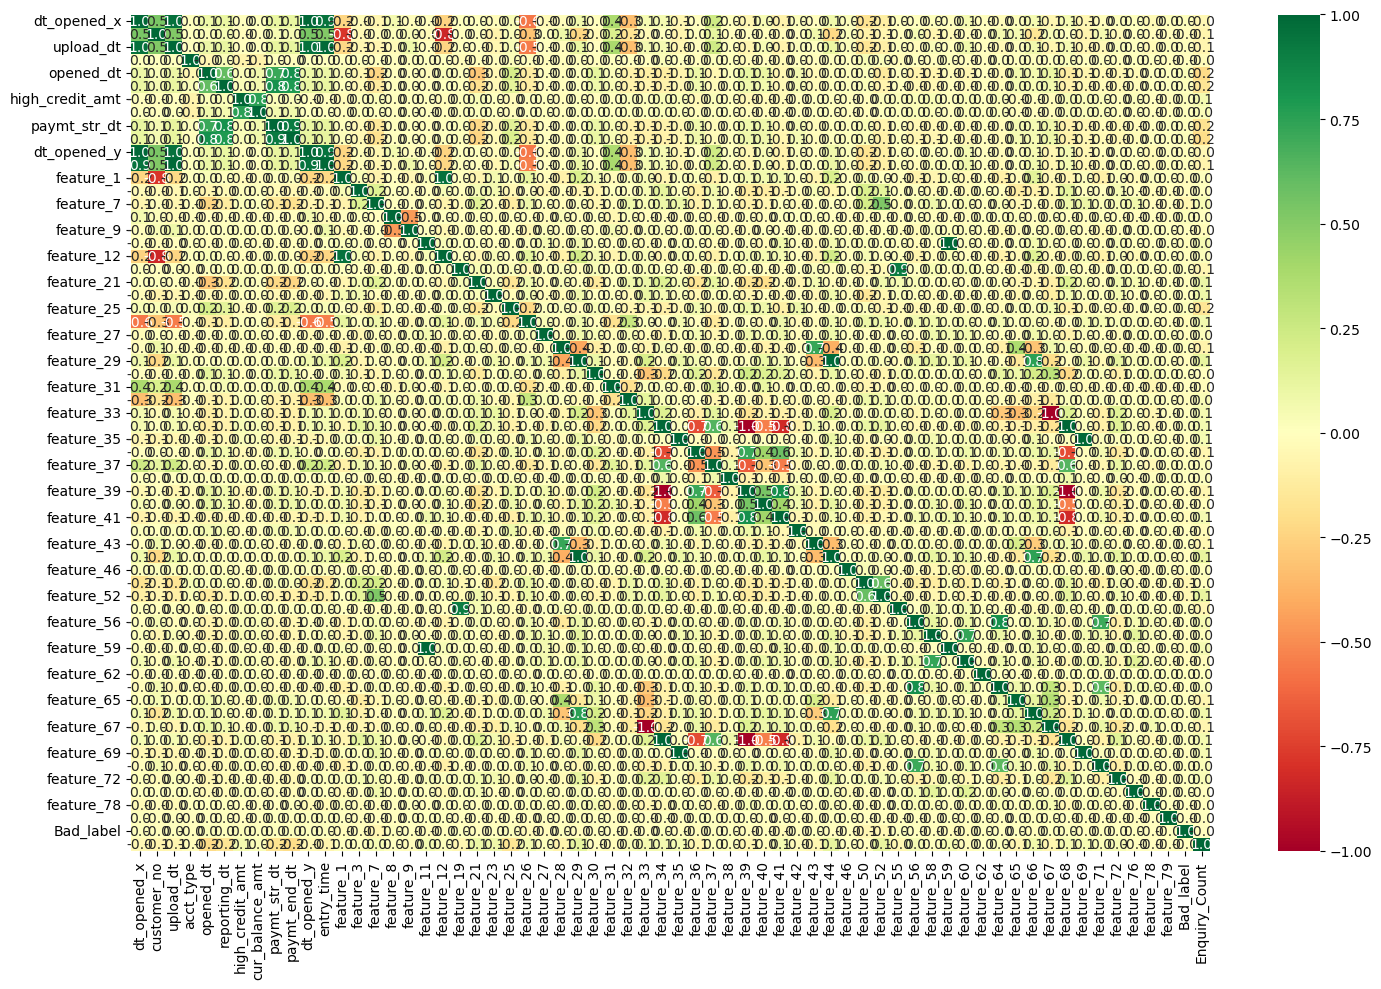

In [19]:
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True,fmt='.1f')
plt.tight_layout()

# Splitting data:

In [21]:
enc = MinMaxScaler()
numcols = ['high_credit_amt', 'cur_balance_amt','feature_3',
       'feature_7','feature_28', 'feature_29', 'feature_30','feature_35','feature_38', 'feature_39','feature_43', 'feature_44',
       'feature_52','feature_65', 'feature_66','feature_69', 'feature_71', 'Enquiry_Count']

In [22]:
data[numcols] = enc.fit_transform(pd.DataFrame(data[numcols]))

In [23]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,opened_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_19,feature_21,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label,Enquiry_Count
0,1447113600000000000,12265,1445299200000000000,6,1370736000000000000,1443571200000000000,0.000116,0.051304,1441065600000000000,1404172800000000000,1447113600000000000,1444867200000000000,4,0.762542,0.046015,0,15,1,10,1,456105600000000000,0,1,0,6,0.688525,0.000096,0.823529,0,2,1,1,0.002333,7,8,0.796398,0.997022,1,4,0,0.405797,0.171301,3,0,0.0,1,10,0,1,0,1,10,0.015589,0.000076,0,1,0.002333,0.333333,1,0,1,0,1,0.117021
1,1447113600000000000,12265,1445299200000000000,10,1337904000000000000,1443830400000000000,0.000090,0.051376,1443657600000000000,1351728000000000000,1447113600000000000,1444867200000000000,4,0.762542,0.046015,0,15,1,10,1,456105600000000000,0,1,0,6,0.688525,0.000096,0.823529,0,2,1,1,0.002333,7,8,0.796398,0.997022,1,4,0,0.405797,0.171301,3,0,0.0,1,10,0,1,0,1,10,0.015589,0.000076,0,1,0.002333,0.333333,1,0,1,0,1,0.117021
2,1447113600000000000,12265,1445299200000000000,10,1332374400000000000,1443571200000000000,0.000228,0.051544,1441065600000000000,1349049600000000000,1447113600000000000,1444867200000000000,4,0.762542,0.046015,0,15,1,10,1,456105600000000000,0,1,0,6,0.688525,0.000096,0.823529,0,2,1,1,0.002333,7,8,0.796398,0.997022,1,4,0,0.405797,0.171301,3,0,0.0,1,10,0,1,0,1,10,0.015589,0.000076,0,1,0.002333,0.333333,1,0,1,0,1,0.117021
3,1437350400000000000,15606,1436400000000000000,10,1137110400000000000,1233360000000000000,0.000519,0.051304,1183248000000000000,1138752000000000000,1437350400000000000,1436140800000000000,3,0.767001,0.102712,0,15,1,7,1,330307200000000000,0,1,2,9,0.295082,0.018268,0.882353,0,4,1,1,0.006667,7,1,0.356525,0.999007,1,2,0,0.304348,0.169900,3,0,0.0,1,13,0,1,0,1,13,0.003797,0.014393,0,1,0.006667,0.333333,1,0,1,0,1,0.170213
4,1437350400000000000,15606,1436400000000000000,6,1421539200000000000,1433030400000000000,0.000112,0.051398,1430438400000000000,1420070400000000000,1437350400000000000,1436140800000000000,3,0.767001,0.102712,0,15,1,7,1,330307200000000000,0,1,2,9,0.295082,0.018268,0.882353,0,4,1,1,0.006667,7,1,0.356525,0.999007,1,2,0,0.304348,0.169900,3,0,0.0,1,13,0,1,0,1,13,0.003797,0.014393,0,1,0.006667,0.333333,1,0,1,0,1,0.170213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182704,1433980800000000000,1611,1432512000000000000,10,1178064000000000000,1430352000000000000,0.000135,0.051473,1427846400000000000,1335830400000000000,1433980800000000000,1432166400000000000,6,0.832776,0.113394,0,15,1,14,1,192758400000000000,0,1,3,9,0.409836,0.647605,0.607843,0,4,1,1,0.003053,7,1,0.464242,0.992060,0,11,0,0.449275,0.702053,3,0,0.0,1,2,0,1,0,1,2,0.001299,0.510225,0,1,0.003053,0.000000,1,0,1,0,0,0.095745
182705,1433980800000000000,1611,1432512000000000000,10,1176249600000000000,1430352000000000000,0.000109,0.051304,1270080000000000000,1249084800000000000,1433980800000000000,1432166400000000000,6,0.832776,0.113394,0,15,1,14,1,192758400000000000,0,1,3,9,0.409836,0.647605,0.607843,0,4,1,1,0.003053,7,1,0.464242,0.992060,0,11,0,0.449275,0.702053,3,0,0.0,1,2,0,1,0,1,2,0.001299,0.510225,0,1,0.003053,0.000000,1,0,1,0,0,0.095745
182706,1433980800000000000,1611,1432512000000000000,10,116398080000000000

In [24]:
x = data.drop('Bad_label',axis=1)
y = data.Bad_label

In [25]:
y

0         1
1         1
2         1
3         1
4         1
         ..
182704    0
182705    0
182706    0
182707    0
182708    0
Name: Bad_label, Length: 182709, dtype: int8

In [26]:
y.value_counts()

Bad_label
0    176282
1      6427
Name: count, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=16)

In [28]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (146167, 63)
x_test (36542, 63)
y_train (146167,)
y_test (36542,)


# Models:

## Define Model:

# Load Model:

In [32]:
F1_Score = pd.DataFrame(columns=['Model_Name', 'F1Score']) 
Acc_Score = pd.DataFrame(columns=['Model_Name', 'AccScore']) 
Gini = pd.DataFrame(columns=['Model_Name', 'gini']) 

# Defining model instance

def LoadModel(x_train,x_test,y_train,y_test,modelname,MLmodel,randstate):
    global F1_Score
    global Acc_Score
    global Gini
    modelinit = MLmodel
    
   # model = modelinit(random_state=rs)
    
    modelinit.fit(x_train,y_train)
    pred = modelinit.predict(x_test)
    f1score = f1_score(y_test,pred)
    acc_score = accuracy_score(y_test,pred)
    auc = roc_auc_score(y_test,pred)
    gini = 2 * auc - 1
    class_report = classification_report(y_test,pred)
    cross_tab = pd.crosstab(y_test,pred)
    model_name = modelinit.__class__.__name__
    
    
    if(randstate == False):
        values = pd.DataFrame({
            'Model_Name':[modelname],
            'F1Score':[f1score]
        })
        accvalues = pd.DataFrame({
            'Model_Name':[modelname],
            'AccScore':[acc_score]
        })
        ginivalues = pd.DataFrame({
            'Model_Name':[modelname],
            'gini':[gini]
        })

        
        F1_Score = pd.concat([F1_Score,values],ignore_index=True)
        Acc_Score = pd.concat([Acc_Score,accvalues],ignore_index=True)
        Gini = pd.concat([Gini,ginivalues],ignore_index=True)

    return f1score,acc_score,gini,class_report,cross_tab,model_name

# LoadMetrics Model:

In [34]:
# Prints the model metrics after processing


def LoadMetrics(modelname,MLmodel,rs1,randstate = False):
    print('modelname-> ',modelname)

    
    sm = SMOTE()
    if(modelname in ('ANN','ANN_RS','ANN_HPT')):
        x_resampled, y_resampled = sm.fit_resample(x, y)
        print(y_resampled.value_counts())
        x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=rs1)
    else:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=rs1)

    f1score,acc_score,gini,class_report,cross_tab,model_name = LoadModel(x_train,x_test,y_train,y_test,modelname,MLmodel,randstate)

    
    if(randstate == False):
        print('Model Name: ',model_name)
        print('\nF1 score->', f1score)
        print('Accuracy Score->',acc_score)
        print('Gini Score->',gini)
        print('Classification Report\n', class_report)
        print('Cross Tab\n',cross_tab)
    else:
        return f1score

# Bestrandstate Model:

In [36]:
# Comparing to see which random state gives best f1 score


def bestrandstate(modelname,model):
    model = model
    f1 = []
    randi = []
    for i in tqdm(range(1,43)):
        f1score = LoadMetrics(modelname,model,i,True)
        f1.append(f1score)
        randi.append(i)
    print(np.max(f1))
    print(randi[np.argmax(f1)])

# GridSearch Model:

In [38]:
#GridSearch model instance


def GridSearch(model,param_grid,rs1):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=rs1)
    grid = GridSearchCV(estimator = model,param_grid = param_grid,scoring = 'accuracy',n_jobs =-1,cv=5,verbose =3)
    grid.fit(x_train,y_train)
    return grid.best_params_

In [39]:
print(x_train.shape)
print(y_train.shape)

(146167, 63)
(146167,)


# Logistic Regression:

### "LR"

In [42]:
sample_weights = {0:1,1:24}
LoadMetrics('LR',LogisticRegression(class_weight=sample_weights),17)

modelname->  LR
Model Name:  LogisticRegression

F1 score-> 0.08648946426112106
Accuracy Score-> 0.8184828416616496
Gini Score-> 0.07969806248310007
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     35232
           1       0.05      0.24      0.09      1310

    accuracy                           0.82     36542
   macro avg       0.51      0.54      0.49     36542
weighted avg       0.93      0.82      0.87     36542

Cross Tab
 col_0          0     1
Bad_label             
0          29595  5637
1            996   314


### "LR_RS"

In [44]:
LoadMetrics('LR_RS',LogisticRegression(class_weight=sample_weights),5)

modelname->  LR_RS
Model Name:  LogisticRegression

F1 score-> 0.08840539796199394
Accuracy Score-> 0.8188385966832685
Gini Score-> 0.08702463575391661
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     35243
           1       0.05      0.25      0.09      1299

    accuracy                           0.82     36542
   macro avg       0.51      0.54      0.49     36542
weighted avg       0.94      0.82      0.87     36542

Cross Tab
 col_0          0     1
Bad_label             
0          29601  5642
1            978   321


# Logistic Regression - Hyperparameter Tuning:

### "LR_HPT"

In [47]:
 #param_grid = {
     #'C': [0.1, 1, 10, 100],
     #'solver': ['liblinear', 'saga']
 #}
 #model = LogisticRegression(class_weight=sample_weights,random_state=5)
 #best_params = GridSearch(model,param_grid,5)
 #print(best_params)

In [48]:
# {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [49]:
bestmodel = LogisticRegression(C = 1, penalty = 'l2',solver = 'liblinear',random_state=5,class_weight=sample_weights)
LoadMetrics('LR_HPT',bestmodel,1)

modelname->  LR_HPT
Model Name:  LogisticRegression

F1 score-> 0.07662746011412601
Accuracy Score-> 0.7830168025833287
Gini Score-> 0.05143673643893032
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     35217
           1       0.05      0.25      0.08      1325

    accuracy                           0.78     36542
   macro avg       0.51      0.53      0.48     36542
weighted avg       0.93      0.78      0.85     36542

Cross Tab
 col_0          0     1
Bad_label             
0          28284  6933
1            996   329


# Decision Tree:

### "DT"

In [52]:
LoadMetrics('DT',DecisionTreeClassifier(class_weight=sample_weights),17)

modelname->  DT
Model Name:  DecisionTreeClassifier

F1 score-> 0.9486590038314177
Accuracy Score-> 0.9963329867002353
Gini Score-> 0.9432784040878868
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35232
           1       0.95      0.95      0.95      1310

    accuracy                           1.00     36542
   macro avg       0.98      0.97      0.97     36542
weighted avg       1.00      1.00      1.00     36542

Cross Tab
 col_0          0     1
Bad_label             
0          35170    62
1             72  1238


### "DT_RS"

In [54]:
LoadMetrics('DT_RS',DecisionTreeClassifier(class_weight=sample_weights),28)

modelname->  DT_RS
Model Name:  DecisionTreeClassifier

F1 score-> 0.9668674698795181
Accuracy Score-> 0.9975918121613486
Gini Score-> 0.9628279230664913
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35210
           1       0.97      0.96      0.97      1332

    accuracy                           1.00     36542
   macro avg       0.98      0.98      0.98     36542
weighted avg       1.00      1.00      1.00     36542

Cross Tab
 col_0          0     1
Bad_label             
0          35170    40
1             48  1284


# DecisionTreeClassfier - Hyperparameter Tuning:

### "DT_HPT"

In [57]:
 #param_grid = {
     #'criterion' : ('gini','entropy'),
     #'splitter' : ('best','random'),
     #'max_depth' : (list(range(1,10))),
     #'min_samples_split': [2,3,4,5,6],
     #'min_samples_leaf' : list(range(1,10))
 #}
 #model = DecisionTreeClassifier(class_weight=sample_weights)
 #best_params = GridSearch(model,param_grid,28)
 #print(best_params)

In [58]:
#{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}

In [59]:
bestmodel = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 4, min_samples_split = 4, splitter = 'random',class_weight=sample_weights,random_state=12)
LoadMetrics('DT_HPT',bestmodel,28)

modelname->  DT_HPT
Model Name:  DecisionTreeClassifier

F1 score-> 0.8729244323957981
Accuracy Score-> 0.9897378359148378
Gini Score-> 0.9575662285403834
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     35210
           1       0.80      0.97      0.87      1332

    accuracy                           0.99     36542
   macro avg       0.90      0.98      0.93     36542
weighted avg       0.99      0.99      0.99     36542

Cross Tab
 col_0          0     1
Bad_label             
0          34879   331
1             44  1288


# XGB:

In [61]:
LoadMetrics('XGB',XGBClassifier(class_weight=sample_weights),28)

modelname->  XGB
Model Name:  XGBClassifier

F1 score-> 0.7992799279927992
Accuracy Score-> 0.9877948661813803
Gini Score-> 0.6666098646217931
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     35210
           1       1.00      0.67      0.80      1332

    accuracy                           0.99     36542
   macro avg       0.99      0.83      0.90     36542
weighted avg       0.99      0.99      0.99     36542

Cross Tab
 col_0          0    1
Bad_label            
0          35208    2
1            444  888


### XGB_RS:

In [63]:
LoadMetrics('XGB_RS',XGBClassifier(class_weight=sample_weights),16)

modelname->  XGB_RS
Model Name:  XGBClassifier

F1 score-> 0.8393351800554016
Accuracy Score-> 0.9904767117289695
Gini Score-> 0.7236977747981821
Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     35286
           1       1.00      0.72      0.84      1256

    accuracy                           0.99     36542
   macro avg       0.99      0.86      0.92     36542
weighted avg       0.99      0.99      0.99     36542

Cross Tab
 col_0          0    1
Bad_label            
0          35285    1
1            347  909


 # XGB - HyperParameter Tuning:

In [65]:
 #param_grid = {'subsample' : [0.5,0.8,1.0],
     #'learning_rate' :[0.01,0.03,0.06,0.1],
     #'max_depth' : [5,6,7,8],
     #'n_estimators' : [50,100,200]
 #}
 #model = XGBClassifier(class_weight=sample_weights)
 #best_params = GridSearch(model,param_grid,24)
 #print(best_params)

In [66]:
#{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}

In [67]:
LoadMetrics('XGB_HPT',XGBClassifier(subsample = 0.8,learning_rate = 0.1,max_depth = 8,n_estmators = 200,class_weight=sample_weights),24)

modelname->  XGB_HPT
Model Name:  XGBClassifier

F1 score-> 0.6813848469643753
Accuracy Score-> 0.9826227354824585
Gini Score-> 0.517107943312558
Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     35229
           1       1.00      0.52      0.68      1313

    accuracy                           0.98     36542
   macro avg       0.99      0.76      0.84     36542
weighted avg       0.98      0.98      0.98     36542

Cross Tab
 col_0          0    1
Bad_label            
0          35228    1
1            634  679


# RandomForest Classifier:

### RFC:

In [70]:
LoadMetrics('RFC',RandomForestClassifier(class_weight=sample_weights),28)

modelname->  RFC
Model Name:  RandomForestClassifier

F1 score-> 0.9420174741858618
Accuracy Score-> 0.9960045974495102
Gini Score-> 0.8903903903903903
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35210
           1       1.00      0.89      0.94      1332

    accuracy                           1.00     36542
   macro avg       1.00      0.95      0.97     36542
weighted avg       1.00      1.00      1.00     36542

Cross Tab
 col_0          0     1
Bad_label             
0          35210     0
1            146  1186


### RFC_RS:

In [72]:
LoadMetrics('RFC_RS',RandomForestClassifier(class_weight=sample_weights),22)

modelname->  RFC_RS
Model Name:  RandomForestClassifier

F1 score-> 0.950389503895039
Accuracy Score-> 0.9966887417218543
Gini Score-> 0.90546875
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35262
           1       1.00      0.91      0.95      1280

    accuracy                           1.00     36542
   macro avg       1.00      0.95      0.97     36542
weighted avg       1.00      1.00      1.00     36542

Cross Tab
 col_0          0     1
Bad_label             
0          35262     0
1            121  1159


# RandomForest Classifier - HyperParameter Tuning:

### RFC_HPT:

In [75]:
 #param_grid = {
         #'n_estimators': [100,200,500,600],
         #'criterion' : ["gini", "entropy", "log_loss"],
         #'max_features' : ['sqrt','log2'],
         #'max_depth' : [int(x) for x in np.linspace(10,110,num=5)],
         #'min_samples_split' : [2,3,5],
         #'min_samples_leaf' : [1,2,4]
 #}
 #model = RandomForestClassifier(class_weight=sample_weights)
 #best_params = GridSearch(model,param_grid,22)
 #print(best_params)

In [76]:
# {criterion=gini, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100}

In [77]:
bestmodel = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_features = 'sqrt',min_samples_split = 3,min_samples_leaf=4,class_weight=sample_weights)
LoadMetrics('RFC_HPT',bestmodel,22)

modelname->  RFC_HPT
Model Name:  RandomForestClassifier

F1 score-> 0.9546753777051857
Accuracy Score-> 0.996962399430792
Gini Score-> 0.91328125
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35262
           1       1.00      0.91      0.95      1280

    accuracy                           1.00     36542
   macro avg       1.00      0.96      0.98     36542
weighted avg       1.00      1.00      1.00     36542

Cross Tab
 col_0          0     1
Bad_label             
0          35262     0
1            111  1169


# ANN:

In [79]:
LoadMetrics('ANN',MLPClassifier(random_state=12),16)

modelname->  ANN
Bad_label
1    176282
0    176282
Name: count, dtype: int64
Model Name:  MLPClassifier

F1 score-> 0.6628732613558992
Accuracy Score-> 0.5084594330123523
Gini Score-> 0.0152205050935037
Classification Report
               precision    recall  f1-score   support

           0       0.59      0.05      0.09     35191
           1       0.50      0.96      0.66     35322

    accuracy                           0.51     70513
   macro avg       0.55      0.51      0.38     70513
weighted avg       0.55      0.51      0.38     70513

Cross Tab
 col_0         0      1
Bad_label             
0          1778  33413
1          1247  34075


### ANN_RS:

In [81]:
LoadMetrics('ANN_RS',MLPClassifier(random_state=16,max_iter=350),18)

modelname->  ANN_RS
Bad_label
1    176282
0    176282
Name: count, dtype: int64
Model Name:  MLPClassifier

F1 score-> 0.666534290225891
Accuracy Score-> 0.49985109128813127
Gini Score-> 0.0
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     35267
           1       0.50      1.00      0.67     35246

    accuracy                           0.50     70513
   macro avg       0.25      0.50      0.33     70513
weighted avg       0.25      0.50      0.33     70513

Cross Tab
 col_0          1
Bad_label       
0          35267
1          35246


# ANN - Hyper Parameter Tuning:

In [83]:
 #param_grid = {
     #"learning_rate_init" : [ 0.001,0.005,0.01],
     #"hidden_layer_sizes" : [(100,50,3),(100,100,3)],
     #"activation" : ['identity', 'logistic', 'tanh', 'relu'],
     #"solver" : ['lbfgs', 'sgd', 'adam'],
 #}
 #model = MLPClassifier(random_state=16,max_iter=350)
 #best_params = GridSearch(model,param_grid,28)
 #print(best_params)

In [84]:
#{'activation': 'logistic', 'hidden_layer_sizes': (100, 50, 3), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}

In [85]:
ANNmodel = MLPClassifier(hidden_layer_sizes = (100,50,3),
                         activation='logistic',
                         solver='lbfgs',
                         learning_rate_init = 0.001,
                         max_iter=350,
                         random_state=16
                         )
LoadMetrics('ANN_HPT',ANNmodel,28)

modelname->  ANN_HPT
Bad_label
1    176282
0    176282
Name: count, dtype: int64
Model Name:  MLPClassifier

F1 score-> 0.6211444560267735
Accuracy Score-> 0.5103456100293563
Gini Score-> 0.021781406728259345
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.22      0.31     35322
           1       0.51      0.80      0.62     35191

    accuracy                           0.51     70513
   macro avg       0.52      0.51      0.46     70513
weighted avg       0.52      0.51      0.46     70513

Cross Tab
 col_0         0      1
Bad_label             
0          7682  27640
1          6887  28304


# Results:

## Data Visualization:

### Visualization of F1 scores:

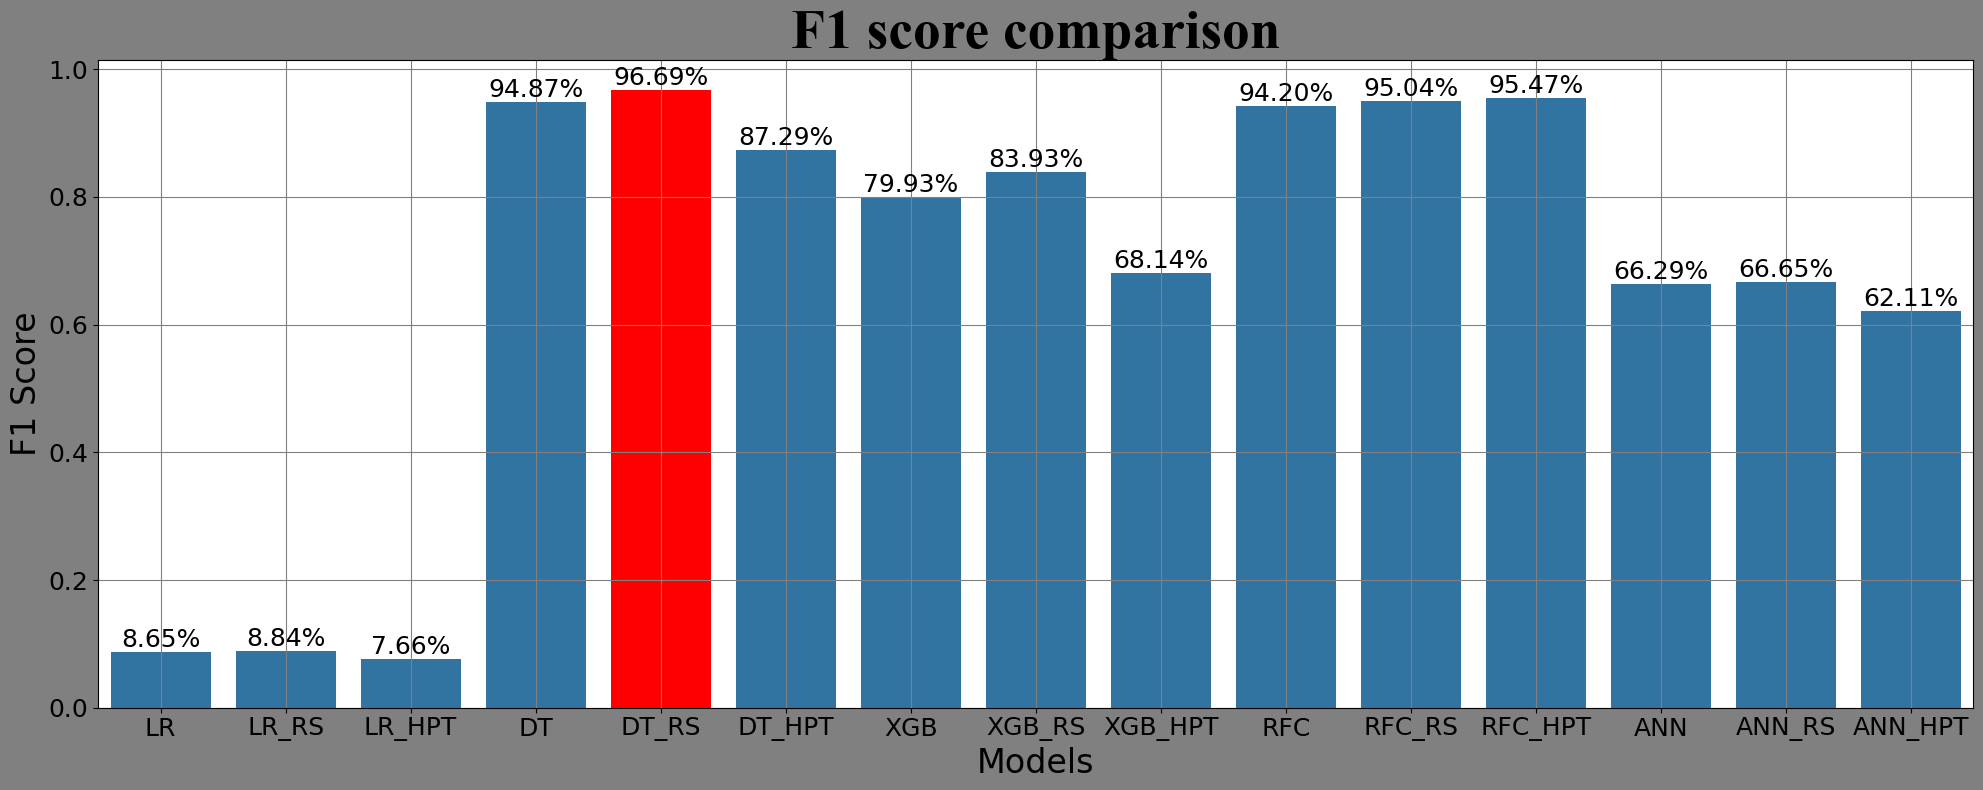

In [189]:
plt.figure(figsize=(20,8),facecolor = 'grey')
F1_Score['Percentage'] = (F1_Score['F1Score']) * 100

ax = sns.barplot(x = 'Model_Name',y = 'F1Score', data=F1_Score)
# Add labels to the bars
for container in ax.containers:
    labels = [f'{v:.2f}%' for v in F1_Score['Percentage']]
    ax.bar_label(container,labels = labels,fontsize = 18)

# Highlight the bar with the maximum value
max_index = F1_Score['F1Score'].idxmax()
ax.patches[max_index].set_facecolor('red')

plt.grid(color='grey')
plt.title('F1 score comparison',fontsize = 40,fontweight='bold',fontname='Times New Roman')
plt.xlabel('Models',fontsize = 24)
plt.ylabel('F1 Score',fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Visualization of Accuracy scores:

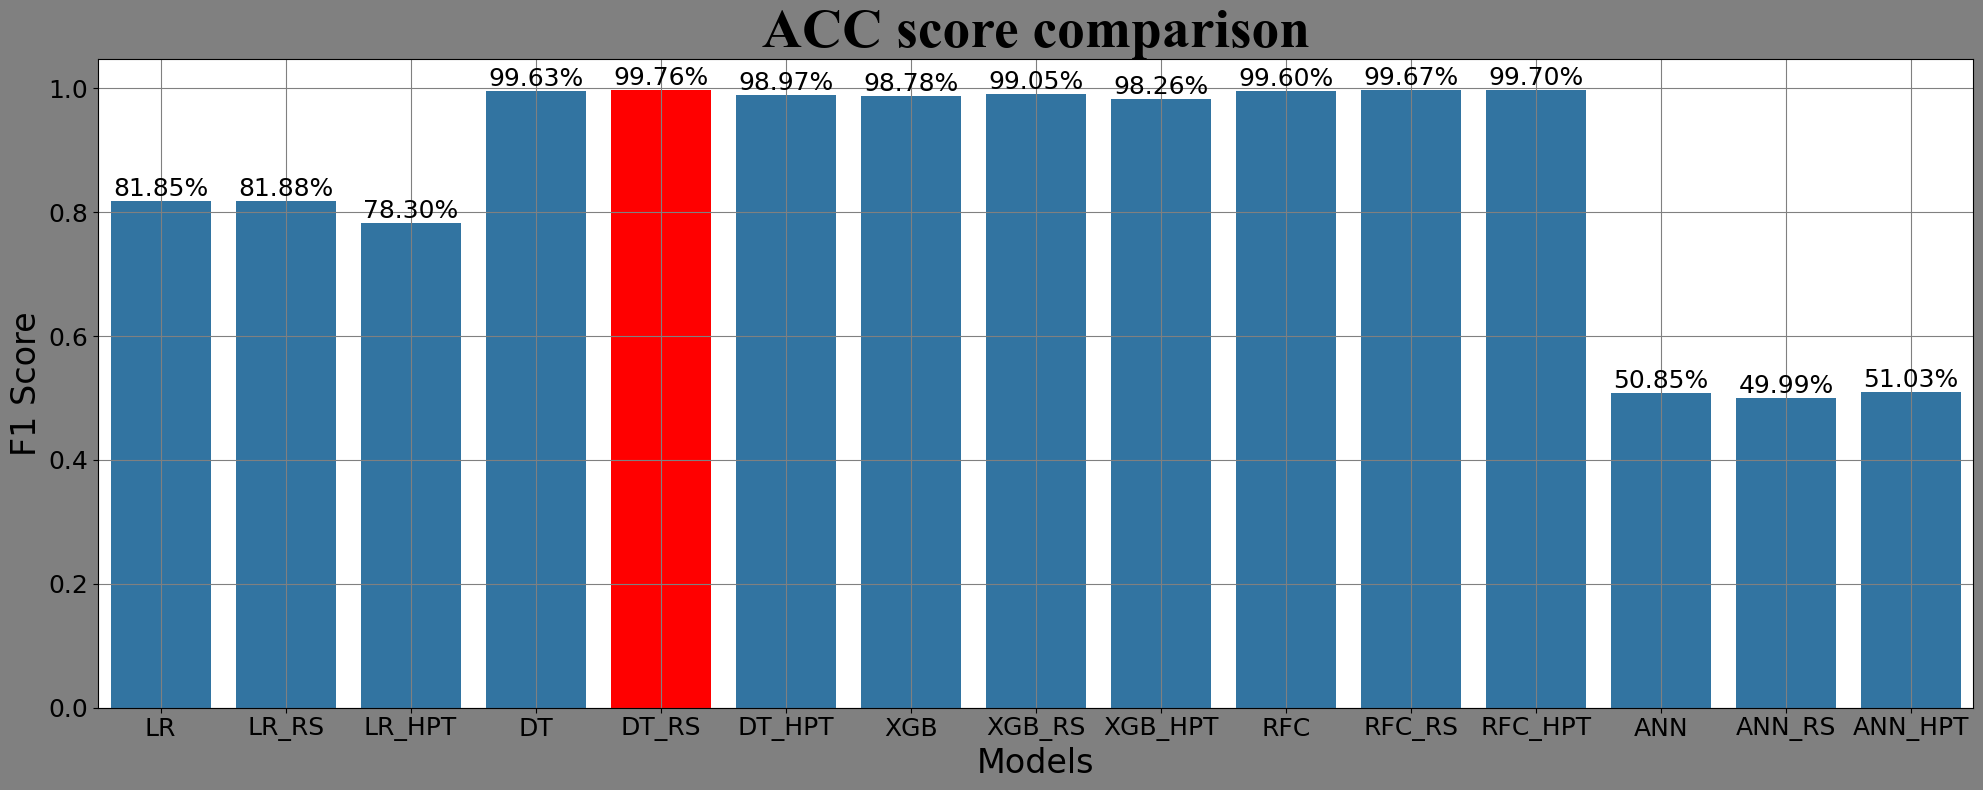

In [187]:
plt.figure(figsize=(20,8),facecolor = 'grey')
Acc_Score['Percentage'] = (Acc_Score['AccScore']) * 100
ax = sns.barplot(x = 'Model_Name',y = 'AccScore', data=Acc_Score)
# Add labels to the bars
for container in ax.containers:
    labels = [f'{v:.2f}%' for v in Acc_Score['Percentage']]
    ax.bar_label(container,labels = labels,fontsize = 18)

# Highlight the bar with the maximum value
max_index = Acc_Score['AccScore'].idxmax()
ax.patches[max_index].set_facecolor('red')

# Plot the bar graph
plt.grid(color='grey')
plt.title('ACC score comparison',fontsize = 40,fontweight='bold',fontname='Times New Roman')
plt.xlabel('Models',fontsize = 24)
plt.ylabel('F1 Score',fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Visualization of Gini:

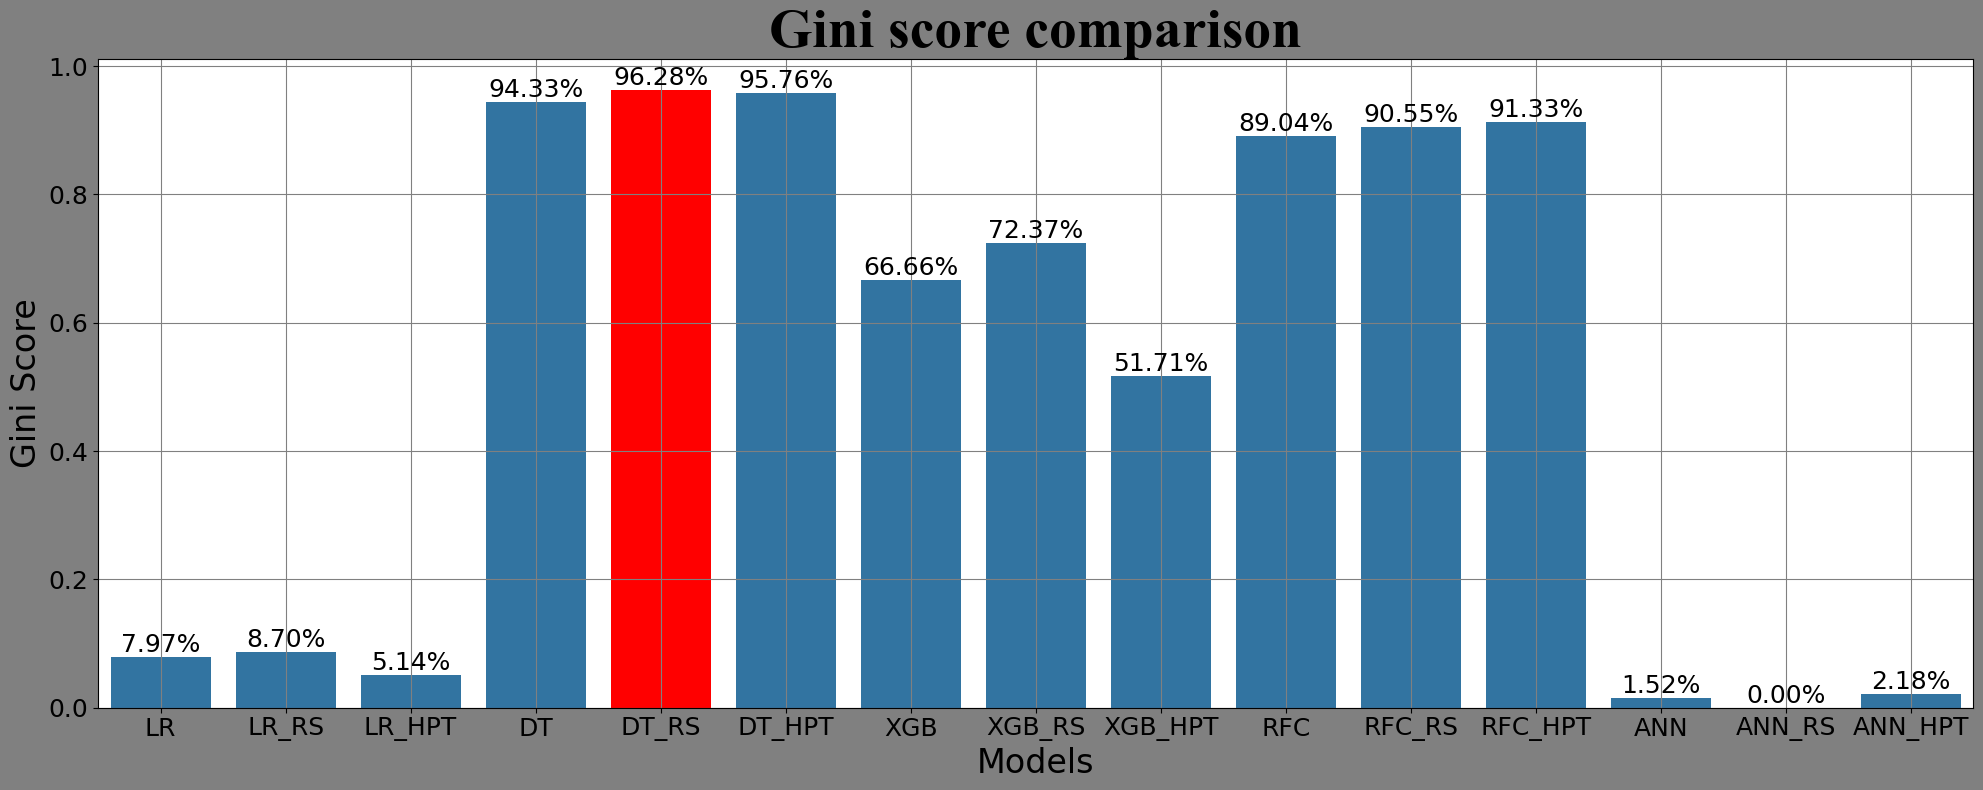

In [185]:
plt.figure(figsize=(20,8),facecolor = 'grey')
Gini['Percentage'] = (Gini['gini']) * 100
ax = sns.barplot(x = 'Model_Name',y = 'gini', data=Gini)
# Add labels to the bars
for container in ax.containers:
    labels = [f'{v:.2f}%' for v in Gini['Percentage']]
    ax.bar_label(container,labels = labels,fontsize = 18)

# Highlight the bar with the maximum value
max_index = Gini['gini'].idxmax()
ax.patches[max_index].set_facecolor('red')

# Plot the bar graph
plt.grid(color='grey')
plt.title('Gini score comparison',fontsize = 40,fontweight='bold',fontname='Times New Roman')
plt.xlabel('Models',fontsize = 24)
plt.ylabel('Gini Score',fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, min_samples_split = 2, splitter = 'best',class_weight=sample_weights,random_state=12)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 24}, criterion='entropy',
                       min_samples_leaf=2, random_state=12)

# Feature Importance:

In [194]:
# Get feature importances from the model
feature_importances = DTC.feature_importances_

# Create a DataFrame for feature importances
feature_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_df.head(10)

,Feature,Importance
62,Enquiry_Count,0.104816
14,feature_7,0.087265
20,feature_21,0.084350
1,customer_no,0.075764
13,feature_3,0.062908
27,feature_30,0.043350
41,feature_44,0.040904
35,feature_38,0.040521
26,feature_29,0.038264
53,feature_66,0.031449


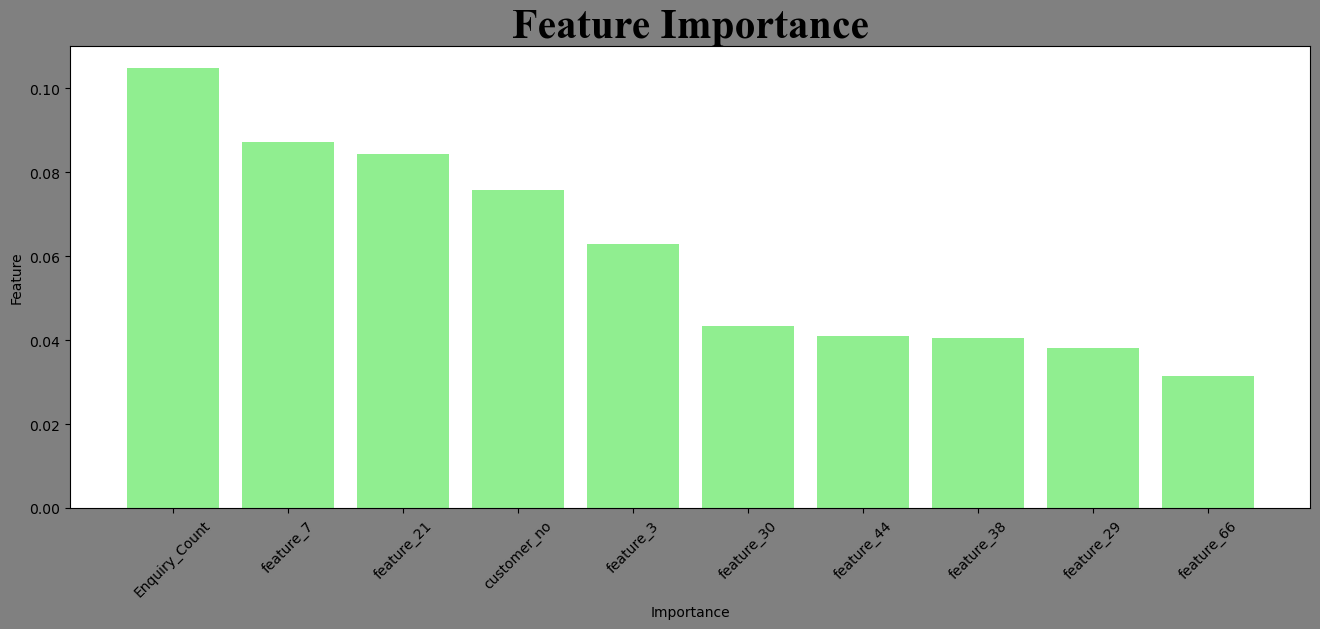

In [212]:
# Plotting top 10 Feature Importances
plt.figure(figsize=(16,6),facecolor='grey')
plt.bar(feature_df['Feature'].head(10), feature_df['Importance'].head(10), color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance',fontsize = 30,fontweight='bold',fontname='Times New Roman')
plt.show()

# Rank Ordering:

In [214]:
DTCPred = DTC.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': DTCPred})

# Rank the predictions based on predicted probabilities
predictions['Rank'] = predictions['Predicted_Prob'].rank(ascending=False)

# Sort by rank
predictions.sort_values('Rank', inplace=True)

# Calculate cumulative actuals and proportions
predictions['Cumulative Actual'] = predictions['Actual'].cumsum()
predictions['Cumulative Proportion'] = predictions['Cumulative Actual'] / predictions['Actual'].sum()

predictions.head(100)

,Actual,Predicted_Prob,Rank,Cumulative Actual,Cumulative Proportion
87717,1,1,677.5,1,0.000760
152954,1,1,677.5,2,0.001521
111492,1,1,677.5,3,0.002281
158254,0,1,677.5,3,0.002281
5837,1,1,677.5,4,0.003042
...,...,...,...,...,...
84732,1,1,677.5,91,0.069202
156026,1,1,677.5,92,0.069962
103473,1,1,677.5,93,0.070722
11322,1,1,677.5,94,0.071483


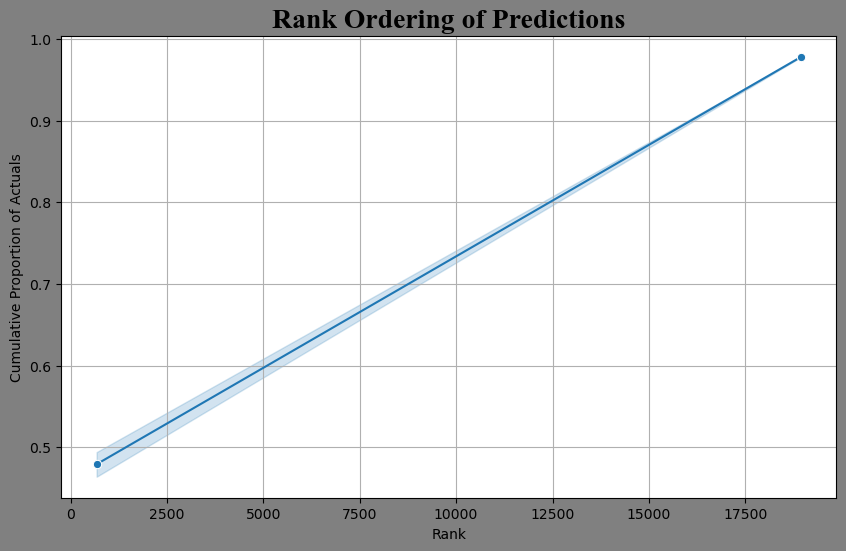

In [223]:
# Plotting Rank Ordering
plt.figure(figsize=(10, 6),facecolor='grey')
sns.lineplot(data=predictions, x='Rank', y='Cumulative Proportion', marker='o')
plt.title('Rank Ordering of Predictions',fontsize = 20,fontweight='bold',fontname='Times New Roman')
plt.xlabel('Rank')
plt.ylabel('Cumulative Proportion of Actuals')
plt.grid(True)
plt.show()

# Conclusion:

## Comparitive Analysis of different models:

Logisitic Regression:

    ----> Logistic regression is a straight forward and efficient algorithm mainly used for classification tasks. In this project, logistic regression achieved an accuracy of 81.88%. Though it captures some of the linear relationship within the data but it falls short of a high performance model.


Decision Tree:

    ----> Decision trees are intuitive and easy-to-interpret models that split data based on feature values to make predictions. With an highest accuracy of 99.76% outperforming Random forest & XGBoost models with minor difference, decision tree will be strong candidate for credit score prediction.

Random Forest:

    ----> Random forest, an ensemble learning method combines multiple decision trees to improve accuracy and reduce overfitting. With an accuracy of 99.70%, random forest significantly overperformed Logistic regression, XGBoost & ANN. The high accuracy indicates that random forest is capable of capturing complex patterns and relationship in the dataset makes random forest will be one strong candidates for credit score prediction.

XGBoost:

    ----> XGBoost (or) eXtreme Gradient Boosting, is a powerful and efficient implementation of gradient boosting designed for speed and performance. With an accuracy of 99.05%, XGBoost proofs that it is one of the high performing models.

ANN:

    ----> Though Artificial neural network is powerful algorithm, recorded an lowest accuracy of 66.65%. Thislower accuracy compared to other algorithms might reflect increased complexity and computational demands.
  

### The evaluation suggests that ensemble method Decision Tree is exceptionally well-suited for capturing complex patterns in the credit risk data, making it ideal for credit score prediction.  